In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import yfinance

In [241]:
project_path = '/Users/symyion/PycharmProjects/master_thesis/'


In [242]:
raw_data = pd.read_csv(project_path + 'data/input/sp500_data.csv')
raw_data

,code,bid,ask,style,volume,strike,iv,put_call
0,SPX.SPX#C078V,948.799988,952.900000,2,0,3275,NaN,call
1,SPX.SPX#C0NQ6,1198.599976,1202.700000,2,0,3025,NaN,call
2,SPX.SPX#C0YYT,1923.699951,1927.800000,2,0,2300,NaN,call
3,SPX.SPX#C14JZ,1123.599976,1127.700000,2,0,3100,NaN,call
4,SPX.SPX#C14ZN,1848.199951,1852.200000,2,0,2375,NaN,call
...,...,...,...,...,...,...,...,...
1777,SPX.SPX#PV27Q,187.500000,191.600006,2,0,4415,15.261475,put
1778,SPX.SPX#PW2V2,177.199997,181.300003,2,0,4405,15.146677,put
1779,SPX.SPX#PX72S,237.800003,240.800003,2,0,4465,18.953093,put
1780,SPX.SPX#PYDNS,168.100006,171.300003,2,0,4395,14.383207,put


In [243]:
filtered_data = raw_data.loc[(raw_data['volume'] > 0) &
                             (raw_data['bid'] > 0)]
filtered_data


,code,bid,ask,style,volume,strike,iv,put_call
9,SPX.SPX#C39PP,1473.400024,1477.500000,2,7,2750,NaN,call
10,SPX.SPX#C4055,624.099976,628.200000,2,2,3600,NaN,call
12,SPX.SPX#C49X6,48.200001,49.300000,2,2820,4200,10.405957,call
15,SPX.SPX#C6G3P,1698.400024,1702.500000,2,3,2525,NaN,call
20,SPX.SPX#C9CXJ,325.700012,329.800000,2,34,3900,31.074133,call
...,...,...,...,...,...,...,...,...
1743,SPX.SPX#PXY9L,7.600000,7.900000,2,577,4095,17.592575,put
1745,SPX.SPX#PYCBT,41.500000,42.000000,2,259,4245,9.445082,put
1746,SPX.SPX#PYMFQ,67.400002,67.900002,2,19,4285,8.817604,put
1747,SPX.SPX#PYYWS,13.500000,14.000000,2,259,4155,13.872974,put


Now it is neccesary to define the "log-moneyness" in order to filter out very deep in the money option contracts.



In [244]:
stock_price = 4247.441

filtered_data = filtered_data.assign(moneyness_log = np.abs(np.log(filtered_data["strike"] / stock_price)))

In [245]:
filtered_data

,code,bid,ask,style,volume,strike,iv,put_call,moneyness_log
9,SPX.SPX#C39PP,1473.400024,1477.500000,2,7,2750,NaN,call,0.434716
10,SPX.SPX#C4055,624.099976,628.200000,2,2,3600,NaN,call,0.165383
12,SPX.SPX#C49X6,48.200001,49.300000,2,2820,4200,10.405957,call,0.011232
15,SPX.SPX#C6G3P,1698.400024,1702.500000,2,3,2525,NaN,call,0.520076
20,SPX.SPX#C9CXJ,325.700012,329.800000,2,34,3900,31.074133,call,0.085340
...,...,...,...,...,...,...,...,...,...
1743,SPX.SPX#PXY9L,7.600000,7.900000,2,577,4095,17.592575,put,0.036550
1745,SPX.SPX#PYCBT,41.500000,42.000000,2,259,4245,9.445082,put,0.000575
1746,SPX.SPX#PYMFQ,67.400002,67.900002,2,19,4285,8.817604,put,0.008804
1747,SPX.SPX#PYYWS,13.500000,14.000000,2,259,4155,13.872974,put,0.022004


In [246]:
filtered_data = filtered_data.loc[filtered_data["moneyness_log"] <= np.log(1.4) ]

In [247]:
filtered_data.dtypes

code              object
bid              float64
ask              float64
style              int64
volume             int64
strike             int64
iv               float64
put_call          object
moneyness_log    float64
dtype: object

<AxesSubplot:xlabel='strike', ylabel='ask'>

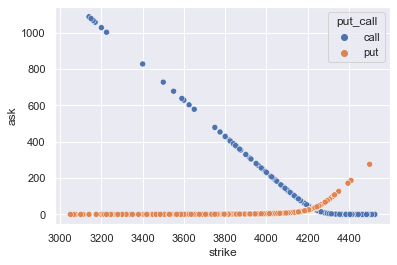

In [248]:
sns.set_theme(style="darkgrid")

sns.scatterplot(x="strike", y="ask",
             hue="put_call",
             data=filtered_data)

In [ ]:
def 